<a href="https://colab.research.google.com/github/Mou-118/System-Development-Project/blob/main/kopalamar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

MOUNTING MY DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

COUNTING THE NO. OF IMAGES IN THE RESPECTIVE CLASSES 0: CANCEROUS 1: HEALTHY

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Thesis/BreaKHis"
number_of_images = {}

import os
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)) )



In [ ]:
number_of_images.items()

dict_items([('Test', 2), ('Train', 2), ('Val', 2), ('.ipynb_checkpoints', 0), ('Seg_Val_Malignant', 578), ('Seg_Val_Benign', 496), ('Seg_Train', 2), ('Seg_Test', 2)])

CNN BASE MODEL BUILDING

In [ ]:
#Importing libraries

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential #To provide inputs one after another
from keras.preprocessing.image import ImageDataGenerator #To load the images and then preprocess it
import keras #Library

In [ ]:
#Model building

base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1536)        0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 batch_normalization (Batch  (None, 256)               10

In [ ]:
#Model compiling

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

PREPARING OUR DATASET USING DATA GENERATOR

In [ ]:
train_path = "/content/drive/MyDrive/Thesis/BreaKHis/Train"
test_path = "/content/drive/MyDrive/Thesis/BreaKHis/Test"

In [ ]:
#TRAIN:


train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')

Found 3758 images belonging to 2 classes.


In [ ]:
#TEST:


test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
    )
validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')

Found 536 images belonging to 2 classes.


In [ ]:
#VALIDATION


val_path = "/content/drive/MyDrive/Thesis/BreaKHis/Val"

EARLY STOPPING AND MODEL CHECK POINT

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping
es=EarlyStopping(patience=3,monitor='val_loss')

filepath='best_model.h5'

#Model checkpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')



CNN BASE MODEL TRAINING

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 8,
    callbacks=checkpoint
    )


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.5938 - auc: 0.7479 - precision: 0.7059 - recall: 0.6000
Epoch 1: val_accuracy improved from -inf to 0.78731, saving model to best_model.h5
8/8 [==============================] - 122s 17s/step - loss: 0.6668 - accuracy: 0.5938 - auc: 0.7479 - precision: 0.7059 - recall: 0.6000 - val_loss: 0.4655 - val_accuracy: 0.7873 - val_auc: 0.8933 - val_precision: 0.7377 - val_recall: 0.9375
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.8248 - accuracy: 0.7188 - auc: 0.6795 - precision: 0.8421 - recall: 0.7273
Epoch 2: val_accuracy did not improve from 0.78731
8/8 [==============================] - 90s 13s/step - loss: 0.8248 - accuracy: 0.7188 - auc: 0.6795 - precision: 0.8421 - recall: 0.7273 - val_loss: 0.5400 - val_accuracy: 0.7631 - val_auc: 0.8809 - val_precision: 0.7059 - val_recall: 0.9583
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.8438 - a

In [ ]:
model.evaluate(train_generator)

940/940 [==============================] - 722s 768ms/step - loss: 0.6455 - accuracy: 0.7179 - auc: 0.8747 - precision: 0.6632 - recall: 0.9669


[0.6454899907112122,
 0.7179350852966309,
 0.8746931552886963,
 0.6631614565849304,
 0.9668644666671753]

In [ ]:
model.evaluate(validation_generator)

134/134 [==============================] - 17s 124ms/step - loss: 0.5472 - accuracy: 0.7631 - auc: 0.8374 - precision: 0.8233 - recall: 0.7118


[0.5472024083137512,
 0.763059675693512,
 0.8374496698379517,
 0.823293149471283,
 0.7118055820465088]

In [ ]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])

In [ ]:
from keras.models import load_model

filepath='best_model.h5'

In [ ]:
acc = model.evaluate(train_generator)[1]
print(f"the accuracy is {acc*100} %")

940/940 [==============================] - 612s 650ms/step - loss: 0.6329 - accuracy: 0.7315 - auc: 0.8763 - precision: 0.6754 - recall: 0.9644
the accuracy is 73.15061092376709 %


134/134 [==============================] - 92s 685ms/step - loss: 0.4890 - accuracy: 0.7910 - auc: 0.8800 - precision: 0.7431 - recall: 0.9340
Train Accuracy: 79.59020733833313
Validation Accuracy: 79.10447716712952
134/134 [==============================] - 93s 687ms/step
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.46      1.00      0.63      1736
           1       0.00      0.00      0.00      2022

    accuracy                           0.46      3758
   macro avg       0.23      0.50      0.32      3758
weighted avg       0.21      0.46      0.29      3758

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.46      1.00      0.63       248
           1       0.00      0.00      0.00       288

    accuracy                           0.46       536
   macro avg       0.23      0.50      0.32       536
weighted avg       0.21      0.46      0.29       536



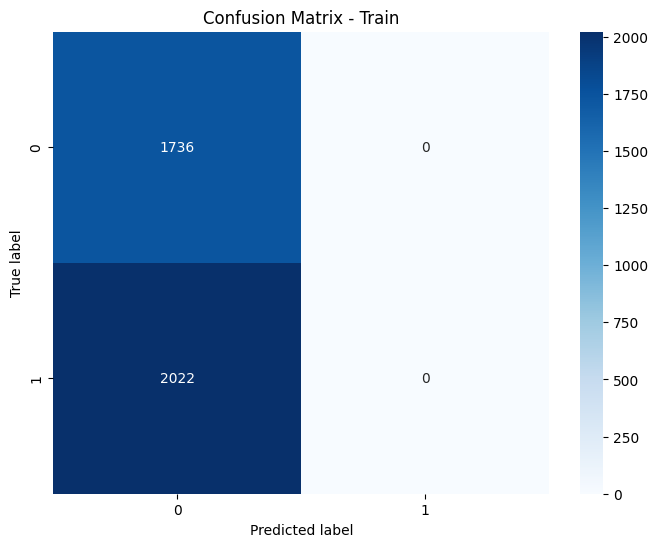

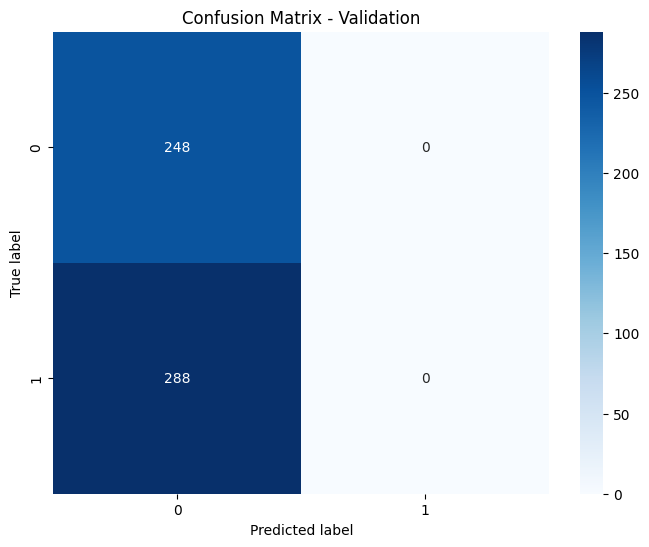

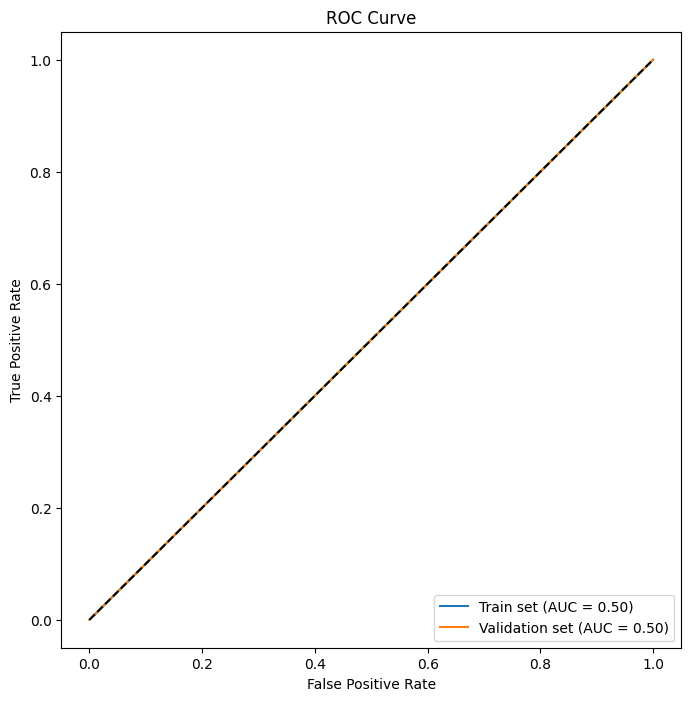

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the best model
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')

# Evaluate the model
results_train = best_model.evaluate(train_generator)
results_test = best_model.evaluate(validation_generator)

train_accuracy = results_train[1] * 100  # Accuracy is the second element in the results_train tuple/list
test_accuracy = results_test[1] * 100  # Accuracy is the second element in the results_test tuple/list

# Print the evaluation results
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

# Print classification report
y_train_pred = np.argmax(best_model.predict(train_generator), axis=1)
y_val_pred = np.argmax(best_model.predict(validation_generator), axis=1)

print("Classification Report (Train):\n", classification_report(train_generator.classes, y_train_pred))
print("Classification Report (Validation):\n", classification_report(validation_generator.classes, y_val_pred))

# Calculate confusion matrix
cm_train = confusion_matrix(train_generator.classes, y_train_pred)
cm_val = confusion_matrix(validation_generator.classes, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(train_generator.classes, y_train_pred)
fpr_val, tpr_val, _ = roc_curve(validation_generator.classes, y_val_pred)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'Train set (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation set (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


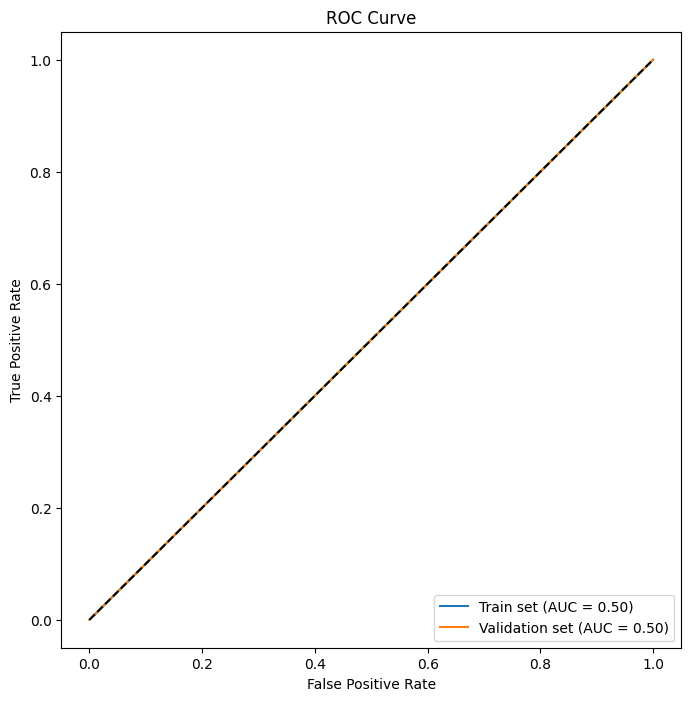

In [ ]:
# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(train_generator.classes, y_train_pred)
fpr_val, tpr_val, _ = roc_curve(validation_generator.classes, y_val_pred)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'Train set (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation set (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
acc = model.evaluate(validation_generator)[1]
print(f"the accuracy is {acc*100} %")

134/134 [==============================] - 18s 133ms/step - loss: 0.5502 - accuracy: 0.7444 - auc: 0.8377 - precision: 0.8240 - recall: 0.6667
the accuracy is 74.44030046463013 %


1/1 [==============================] - 3s 3s/step
[[0.27679488]]
THE UPLOADED IMAGE IS SUSPECTED AS: Benign(Healthy)


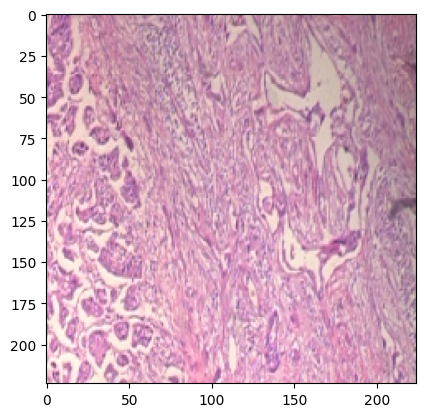

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Thesis/BreaKHis/Test/Malignant/SOB_M_DC-14-10926-40-006.png',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Benign(Healthy)"
else:
      op="Malignant(Cancerous)"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

DEPLOYMENT

In [ ]:
!pip install streamlit

!pip install pyngrok==4.1.10
from pyngrok import ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.10-py3-none-any.whl size=16373 sha256=6e6a47609aee315a44f1ad58ca9f9284596d1cc5ae95de478698b59e5738db99
  Stored in directory: /root/.cache/pip/wheels/63/5c/22/11b1a388ef997609539a07cfae28f008dc94da65d654649976
Successfully built pyngrok


In [ ]:
%%writefile app.py

import streamlit as st
import numpy as np

st.title('Breast cancer detection')

Overwriting app.py
